In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [3]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [4]:
np.random.seed(42)

In [5]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    # Sign Curve 1
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    # Sign Curve 2
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    # Noise
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    
    return series[..., np.newaxis].astype(np.float32)

In [6]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [7]:
x_train.shape, x_valid.shape, x_test.shape

((7000, 50, 1), (2000, 50, 1), (1000, 50, 1))

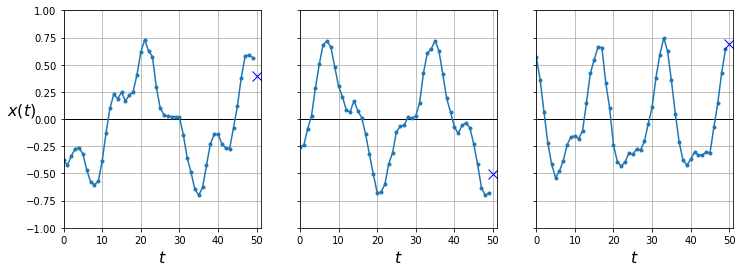

In [8]:
def plot_series(series, y=None, y_pred=None, x_label='$t$', y_label='$x(t)$'):
    plt.plot(series,'.-')
    if y is not None:
        plt.plot(n_steps, y, 'bx', markersize = 10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, 'ro')
    plt.grid(True)
    
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    
    plt.hlines(0, 0, 100, lw = 1)
    plt.axis([0, n_steps + 1, -1, 1])
    
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(x_valid[col, :, 0], y_valid[col, 0], y_label = ('$x(t)$' if col ==0 else None))
plt.show()


In [9]:
y_pred = x_valid[:, -1]

In [10]:
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

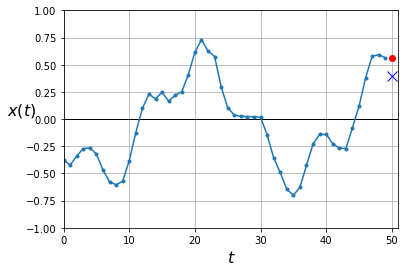

In [11]:
plot_series(x_valid[0, : , 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

In [13]:
model.compile(loss = 'mse',
             optimizer ='adam')

In [14]:
history = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 2s 330us/sample - loss: 0.1760 - val_loss: 0.1023
Epoch 2/20
7000/7000 [==============================] - 0s 71us/sample - loss: 0.0712 - val_loss: 0.0486
Epoch 3/20
7000/7000 [==============================] - 0s 60us/sample - loss: 0.0366 - val_loss: 0.0276
Epoch 4/20
7000/7000 [==============================] - 0s 57us/sample - loss: 0.0227 - val_loss: 0.0191
Epoch 5/20
7000/7000 [==============================] - 0s 59us/sample - loss: 0.0169 - val_loss: 0.0155
Epoch 6/20
7000/7000 [==============================] - 0s 53us/sample - loss: 0.0141 - val_loss: 0.0135
Epoch 7/20
7000/7000 [==============================] - 0s 56us/sample - loss: 0.0123 - val_loss: 0.0119
Epoch 8/20
7000/7000 [==============================] - 0s 56us/sample - loss: 0.0109 - val_loss: 0.0106
Epoch 9/20
7000/7000 [==============================] - 0s 60us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 

In [15]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 33us/sample - loss: 0.0046


0.0046153546907007695

In [16]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, 'b.-', label = 'Training loss')
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, 'r.-', label = 'Validation loss')
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0 , 0.05])
    plt.legend(fontsize=14)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()

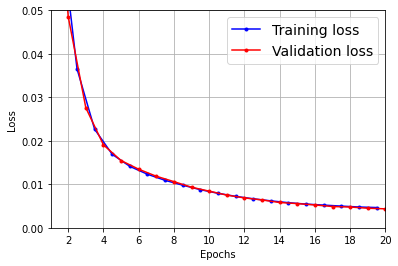

In [17]:
plot_learning_curves(history.history['loss'], history.history['val_loss'])
plt.show()

## Simple RNN

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [19]:
model.compile(loss = 'mse',
             optimizer ='adam')

In [20]:
history2 = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 641us/sample - loss: 0.2405 - val_loss: 0.2298
Epoch 2/20
7000/7000 [==============================] - 4s 530us/sample - loss: 0.2014 - val_loss: 0.1921
Epoch 3/20
7000/7000 [==============================] - 4s 520us/sample - loss: 0.1687 - val_loss: 0.1614
Epoch 4/20
7000/7000 [==============================] - 4s 520us/sample - loss: 0.1430 - val_loss: 0.1377
Epoch 5/20
7000/7000 [==============================] - 4s 519us/sample - loss: 0.1209 - val_loss: 0.1143
Epoch 6/20
7000/7000 [==============================] - 4s 530us/sample - loss: 0.0987 - val_loss: 0.0920
Epoch 7/20
7000/7000 [==============================] - 4s 530us/sample - loss: 0.0789 - val_loss: 0.0729
Epoch 8/20
7000/7000 [==============================] - 4s 533us/sample - loss: 0.0620 - val_loss: 0.0567
Epoch 9/20
7000/7000 [==============================] - 4s 529us/sample - loss: 0.0476 - val_loss: 0.043

In [21]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 118us/sample - loss: 0.0118


0.011774628221988678

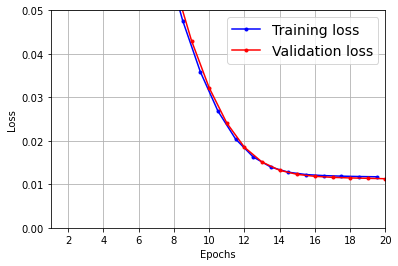

In [22]:
plot_learning_curves(history2.history['loss'], history2.history['val_loss'])
plt.show()

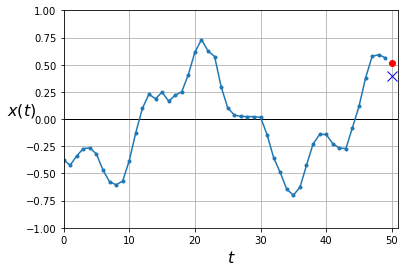

In [23]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Deep RNN

In [24]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [25]:
model.compile(loss = 'mse', optimizer ='adam')

In [26]:
history3 = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0180 - val_loss: 0.0046
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0039 - val_loss: 0.0034
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0036 - val_loss: 0.0032
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0035 - val_loss: 0.0031
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 7/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0033 - val_loss: 0.0035
Epoch 8/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0033 - val_loss: 0.0035
Epoch 9/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 1

In [27]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 275us/sample - loss: 0.0030


0.0030445194877684115

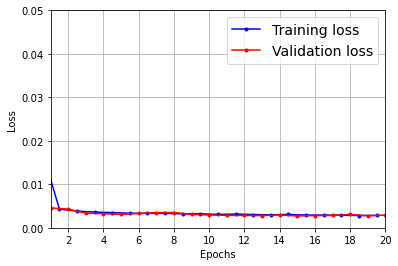

In [28]:
plot_learning_curves(history3.history['loss'], history3.history['val_loss'])
plt.show()

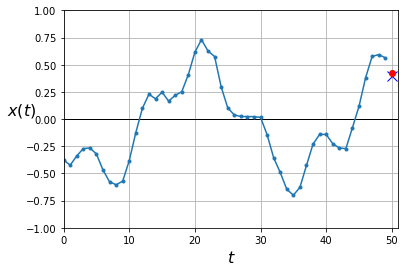

In [29]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [30]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss = 'mse', optimizer ='adam')


In [31]:
history4 = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0118 - val_loss: 0.0035
Epoch 2/20
7000/7000 [==============================] - 7s 987us/sample - loss: 0.0034 - val_loss: 0.0030
Epoch 3/20
7000/7000 [==============================] - 7s 976us/sample - loss: 0.0032 - val_loss: 0.0029
Epoch 4/20
7000/7000 [==============================] - 7s 976us/sample - loss: 0.0029 - val_loss: 0.0027
Epoch 5/20
7000/7000 [==============================] - 7s 972us/sample - loss: 0.0028 - val_loss: 0.0027
Epoch 6/20
7000/7000 [==============================] - 7s 963us/sample - loss: 0.0028 - val_loss: 0.0026
Epoch 7/20
7000/7000 [==============================] - 7s 974us/sample - loss: 0.0027 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 7s 975us/sample - loss: 0.0028 - val_loss: 0.0025
Epoch 9/20
7000/7000 [==============================] - 7s 971us/sample - loss: 0.0027 - val_loss: 0.0026


In [32]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 187us/sample - loss: 0.0026


0.0025691027864813806

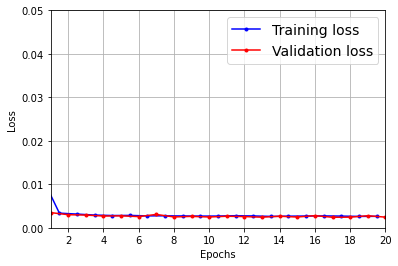

In [33]:
plot_learning_curves(history4.history['loss'], history4.history['val_loss'])
plt.show()

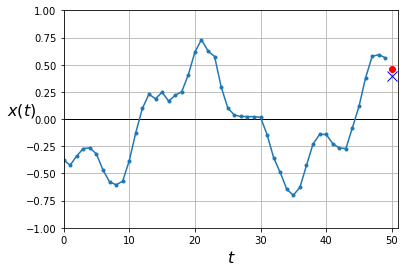

In [34]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [35]:
np.random.seed(43)   # 처음 훈련세트 시드를 42를 주었기 때문에 43를 줌
series = generate_time_series(1, n_steps + 10)
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
x = x_new
for step_ahead in range(10):
    y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)

y_pred = x[:, n_steps:]

In [36]:
y_pred.shape

(1, 10, 1)

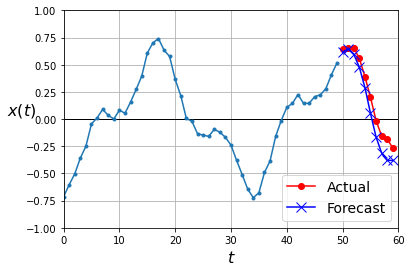

In [37]:
def plot_multiple_forecasts(x, y, y_pred):
    n_steps = x.shape[1]
    ahead = y.shape[1]
    plot_series(x[0, : ,0])
    plt.plot(np.arange(n_steps, n_steps + ahead), y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(x_new, y_new, y_pred)
plt.show()

In [48]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps +10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [49]:
x = x_valid
for step_ahead in range(10):
    y_pred_one = model.predict(x)[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)
y_preds = x[:, n_steps:, 0]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 10

In [40]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [41]:
model.compile(loss = keras.losses.mean_squared_error,
             optimizer = keras.optimizers.Adam())

In [42]:
history5 = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0487 - val_loss: 0.0243
Epoch 2/20
7000/7000 [==============================] - 6s 862us/sample - loss: 0.0194 - val_loss: 0.0152
Epoch 3/20
7000/7000 [==============================] - 6s 862us/sample - loss: 0.0138 - val_loss: 0.0129
Epoch 4/20
7000/7000 [==============================] - 6s 861us/sample - loss: 0.0115 - val_loss: 0.0104
Epoch 5/20
7000/7000 [==============================] - 6s 870us/sample - loss: 0.0110 - val_loss: 0.0109
Epoch 6/20
7000/7000 [==============================] - 6s 851us/sample - loss: 0.0105 - val_loss: 0.0095
Epoch 7/20
7000/7000 [==============================] - 6s 855us/sample - loss: 0.0105 - val_loss: 0.0087
Epoch 8/20
7000/7000 [==============================] - 6s 841us/sample - loss: 0.0096 - val_loss: 0.0095
Epoch 9/20
7000/7000 [==============================] - 6s 839us/sample - loss: 0.0095 - val_loss: 0.0093


In [43]:
y_pred = model.predict(x_new)

In [44]:
y_pred

array([[ 0.5434964 ,  0.5663695 ,  0.51649785,  0.43663335,  0.33385655,
         0.19495693,  0.12457857,  0.00237518, -0.10377954, -0.18452232]],
      dtype=float32)

In [45]:
np.mean(keras.metrics.mean_squared_error(y_valid, y_pred))

0.27420577

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 0s 70us/sample - loss: 0.1348 - val_loss: 0.0610
Epoch 2/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0501 - val_loss: 0.0427
Epoch 3/20
7000/7000 [==============================] - 0s 44us/sample - loss: 0.0388 - val_loss: 0.0356
Epoch 4/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0334 - val_loss: 0.0314
Epoch 5/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0299 - val_loss: 0.0286
Epoch 6/20
7000/7000 [==============================] - 0s 44us/sample - loss: 0.0275 - val_loss: 0.0264
Epoch 7/20
7000/7000 [==============================] - 0s 44us/sample - loss: 0.0258 - val_loss: 0.0251
Epoch 8/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0245 - val_loss: 0.0237
Epoch 9/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0235 - val_loss: 0.0229
Epoch 1

In [54]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0598 - val_loss: 0.0338
Epoch 2/20
7000/7000 [==============================] - 6s 834us/sample - loss: 0.0305 - val_loss: 0.0245
Epoch 3/20
7000/7000 [==============================] - 6s 841us/sample - loss: 0.0216 - val_loss: 0.0170
Epoch 4/20
7000/7000 [==============================] - 6s 837us/sample - loss: 0.0154 - val_loss: 0.0122
Epoch 5/20
7000/7000 [==============================] - 6s 848us/sample - loss: 0.0126 - val_loss: 0.0110
Epoch 6/20
7000/7000 [==============================] - 6s 837us/sample - loss: 0.0119 - val_loss: 0.0108
Epoch 7/20
7000/7000 [==============================] - 6s 836us/sample - loss: 0.0111 - val_loss: 0.0119
Epoch 8/20
7000/7000 [==============================] - 6s 845us/sample - loss: 0.0109 - val_loss: 0.0116
Epoch 9/20
7000/7000 [==============================] - 6s 853us/sample - loss: 0.0108 - val_loss: 0.0131


In [55]:
series = generate_time_series(1, 50 + 10)
x_new, y_new = series[:, :50, :], series[:, -10:, :]
y_pred = model.predict(x_new)[..., np.newaxis]

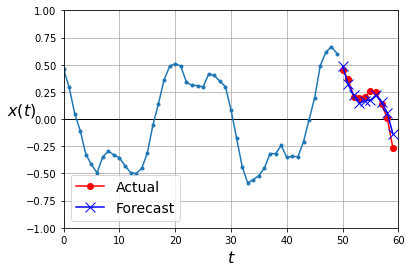

In [56]:
plot_multiple_forecasts(x_new, y_new, y_pred)
plt.show()

In [57]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
x_train = series[:7000, :n_steps]
x_valid = series[7000:9000, :n_steps]
x_test = series[9000:, :n_steps]

In [60]:
y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10+1):
    y[..., step_ahead - 1] = series[...,step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [61]:
x_train.shape, y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [62]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [63]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:,-1])

In [64]:
optimizer = keras.optimizers.Adam(0.01)
model.compile(loss='mse', optimizer = optimizer, metrics=[last_time_step_mse])

In [65]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0522 - last_time_step_mse: 0.0411 - val_loss: 0.0435 - val_last_time_step_mse: 0.0310
Epoch 2/20
7000/7000 [==============================] - 6s 889us/sample - loss: 0.0426 - last_time_step_mse: 0.0314 - val_loss: 0.0388 - val_last_time_step_mse: 0.0285
Epoch 3/20
7000/7000 [==============================] - 6s 862us/sample - loss: 0.0343 - last_time_step_mse: 0.0227 - val_loss: 0.0323 - val_last_time_step_mse: 0.0214
Epoch 4/20
7000/7000 [==============================] - 6s 870us/sample - loss: 0.0280 - last_time_step_mse: 0.0162 - val_loss: 0.0261 - val_last_time_step_mse: 0.0143
Epoch 5/20
7000/7000 [==============================] - 6s 886us/sample - loss: 0.0265 - last_time_step_mse: 0.0147 - val_loss: 0.0248 - val_last_time_step_mse: 0.0129
Epoch 6/20
7000/7000 [==============================] - 6s 895us/sample - loss: 0.0240 - last_time_step_mse: 0.011

In [66]:
series = generate_time_series(1, 50 + 10)
x_new, y_new = series[:, :50, :], series[:, 50:, :]
y_pred = model.predict(x_new)[:, -1][..., np.newaxis]

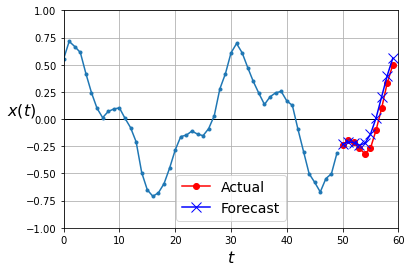

In [67]:
plot_multiple_forecasts(x_new, y_new, y_pred)
plt.show()

In [71]:
from tensorflow.keras.layers import LayerNormalization

In [83]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__ (self, units, activation='tanh', **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.units = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [84]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [85]:
model.compile(loss ='mse', optimizer = 'adam', metrics = [last_time_step_mse])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 17s 2ms/sample - loss: 0.1630 - last_time_step_mse: 0.1539 - val_loss: 0.0766 - val_last_time_step_mse: 0.0687
Epoch 2/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0652 - last_time_step_mse: 0.0544 - val_loss: 0.0570 - val_last_time_step_mse: 0.0445
Epoch 3/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0534 - last_time_step_mse: 0.0381 - val_loss: 0.0502 - val_last_time_step_mse: 0.0332
Epoch 4/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0475 - last_time_step_mse: 0.0313 - val_loss: 0.0449 - val_last_time_step_mse: 0.0288
Epoch 5/20
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0430 - last_time_step_mse: 0.0277 - val_loss: 0.0410 - val_last_time_step_mse: 0.0252
Epoch 6/20
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0397 - last_time_step_mse: 0.0249 - 

## LSTM

In [86]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [88]:
model.compile(loss='mse', optimizer = 'adam', metrics=[last_time_step_mse])

In [89]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 577us/sample - loss: 0.0770 - last_time_step_mse: 0.0619 - val_loss: 0.0536 - val_last_time_step_mse: 0.0324
Epoch 2/20
7000/7000 [==============================] - 1s 197us/sample - loss: 0.0461 - last_time_step_mse: 0.0235 - val_loss: 0.0416 - val_last_time_step_mse: 0.0192
Epoch 3/20
7000/7000 [==============================] - 1s 198us/sample - loss: 0.0379 - last_time_step_mse: 0.0157 - val_loss: 0.0360 - val_last_time_step_mse: 0.0147
Epoch 4/20
7000/7000 [==============================] - 1s 195us/sample - loss: 0.0342 - last_time_step_mse: 0.0138 - val_loss: 0.0328 - val_last_time_step_mse: 0.0126
Epoch 5/20
7000/7000 [==============================] - 1s 201us/sample - loss: 0.0320 - last_time_step_mse: 0.0128 - val_loss: 0.0317 - val_last_time_step_mse: 0.0136
Epoch 6/20
7000/7000 [==============================] - 1s 193us/sample - loss: 0.0305 - last_time_step_mse: 0.0

## LSTMCell

In [90]:
model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [92]:
model.compile(loss='mse', optimizer= 'adam', metrics=[last_time_step_mse])

In [93]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0764 - last_time_step_mse: 0.0609 - val_loss: 0.0546 - val_last_time_step_mse: 0.0339
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0487 - last_time_step_mse: 0.0280 - val_loss: 0.0434 - val_last_time_step_mse: 0.0226
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0395 - last_time_step_mse: 0.0183 - val_loss: 0.0368 - val_last_time_step_mse: 0.0164
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0350 - last_time_step_mse: 0.0148 - val_loss: 0.0336 - val_last_time_step_mse: 0.0133
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0327 - last_time_step_mse: 0.0134 - val_loss: 0.0328 - val_last_time_step_mse: 0.0142
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0312 - last_time_step_mse: 0.0125 - v

## GRU

In [98]:
model = keras.models.Sequential([
    keras.layers.Conv1D(20, 4, 2, padding='valid', input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss='mse', optimizer='adam', metrics=[last_time_step_mse])

In [99]:
history = model.fit(x_train, y_train[:, 3::2], epochs=20, validation_data=(x_valid, y_valid[:, 3::2]))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 521us/sample - loss: 0.0674 - last_time_step_mse: 0.0596 - val_loss: 0.0442 - val_last_time_step_mse: 0.0360
Epoch 2/20
7000/7000 [==============================] - 1s 140us/sample - loss: 0.0390 - last_time_step_mse: 0.0313 - val_loss: 0.0346 - val_last_time_step_mse: 0.0261
Epoch 3/20
7000/7000 [==============================] - 1s 140us/sample - loss: 0.0317 - last_time_step_mse: 0.0235 - val_loss: 0.0289 - val_last_time_step_mse: 0.0192
Epoch 4/20
7000/7000 [==============================] - 1s 139us/sample - loss: 0.0274 - last_time_step_mse: 0.0175 - val_loss: 0.0258 - val_last_time_step_mse: 0.0148
Epoch 5/20
7000/7000 [==============================] - 1s 142us/sample - loss: 0.0247 - last_time_step_mse: 0.0138 - val_loss: 0.0248 - val_last_time_step_mse: 0.0142
Epoch 6/20
7000/7000 [==============================] - 1s 144us/sample - loss: 0.0232 - last_time_step_mse: 0.0

In [100]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

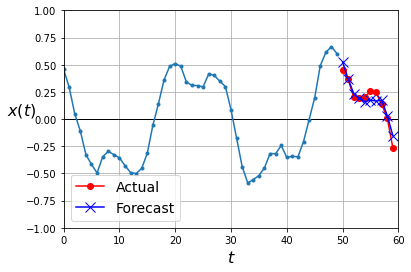

In [101]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)

## WaveNET

In [102]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))

for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding='causal',
                                 activation='relu', dilation_rate=rate))
    
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss='mse', optimizer ='adam', metrics=[last_time_step_mse])

In [103]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 373us/sample - loss: 0.0623 - last_time_step_mse: 0.0503 - val_loss: 0.0360 - val_last_time_step_mse: 0.0220
Epoch 2/20
7000/7000 [==============================] - 1s 149us/sample - loss: 0.0318 - last_time_step_mse: 0.0185 - val_loss: 0.0287 - val_last_time_step_mse: 0.0154
Epoch 3/20
7000/7000 [==============================] - 1s 152us/sample - loss: 0.0276 - last_time_step_mse: 0.0150 - val_loss: 0.0267 - val_last_time_step_mse: 0.0144
Epoch 4/20
7000/7000 [==============================] - 1s 153us/sample - loss: 0.0260 - last_time_step_mse: 0.0135 - val_loss: 0.0253 - val_last_time_step_mse: 0.0127
Epoch 5/20
7000/7000 [==============================] - 1s 158us/sample - loss: 0.0250 - last_time_step_mse: 0.0125 - val_loss: 0.0246 - val_last_time_step_mse: 0.0120
Epoch 6/20
7000/7000 [==============================] - 1s 157us/sample - loss: 0.0243 - last_time_step_mse: 0.0

In [104]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

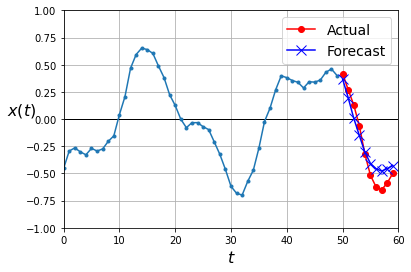

In [105]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)